<h1 style='font-size:30px; color:Red; font-weight: bold; font-style:italic;'>Self-case study 1 title: Network intrusion detection tags</h1>

<p style='font-size:30px; font-style:italic; font-weight: bold;'>Table of contents</p>

<p style='font-size:15px; color:green; font-style:italic;'>7.&emsp;Load and spliting dataset</p>

<p style='font-size:15px; color:green; font-style:italic;'>8.&emsp;Feature engineering and scaling</p>

<p style='font-size:15px; color:green; font-style:italic;'>9.&emsp;Model training and hyperparameter tuning
    <ul>
        <li style='font-size:15px; color:green; font-style:italic;'>tunning models with same number datapoints of both normal and abnormal class labels</li>
        <li style='font-size:15px; color:green; font-style:italic;'>tunning model with the original imbalanced data yielded after preprocessing and cleaning</li>
    </ul>
</p>

<p style='font-size:15px; color:green; font-style:italic;'>10.&emsp;Summary of all the estimators with their respective scores and auc</p>

<p style='font-size:15px; color:green; font-style:italic;'>11.&emsp;Saving models, scaling vectors and the unique categories in proto, service, state feature, engineered features name in pickle file</p>

<p style='font-size:25px; font-style:italic; font-weight: bold;'>7.&emsp;Load and spliting dataset</p>

In [1]:
### importing libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import gc
from sklearn.model_selection import RandomizedSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## setting random seed
SEED = 42
np.random.seed(SEED)

pd.options.display.precision=12
pd.options.display.max_columns=45

root_path = 'E:/case study 1/intrusion detection/UNSW-NB15 - CSV Files/'


In [3]:
### loading cleaned and preprocessed dataframe from disk
df = pd.read_csv(root_path+'final_preprocessed_NIDS_dataset.csv')
print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (2059418, 33)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059418 entries, 0 to 2059417
Data columns (total 33 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             object 
 1   state             object 
 2   dur               float64
 3   sbytes            int64  
 4   dbytes            int64  
 5   sttl              int64  
 6   dttl              int64  
 7   service           object 
 8   Sload             float64
 9   Dload             float64
 10  Spkts             int64  
 11  stcpb             int64  
 12  dtcpb             int64  
 13  smeansz           int64  
 14  dmeansz           int64  
 15  trans_depth       int64  
 16  res_bdy_len       int64  
 17  Sjit              float64
 18  Djit              float64
 19  Stime             int64  
 20  Sintpkt           float64
 21  Dintpkt           float64
 22  tcprtt            float64
 23  ct_state_ttl      int64  
 24  ct_flw_http_mthd  float64
 25  is_ftp_login      float64
 26  ct_srv_src    

<p style='font-size:25px; font-style:italic; font-weight: bold;'>8.&emsp;Feature engineering and scaling</p>

In [6]:
### uniques list for categories in proto features
unique_proto = list(df['proto'].unique())
### uniques list for categories in state feature
unique_state = list(df['state'].unique())
### uniques list for categories in service feature
unique_service = list(df['service'].unique())

def numerical_proto(x):
    '''this function will return index of a category present in the list'''
    return unique_proto.index(x)
def numerical_state(x):
    '''this function will return index of a category present in the list'''
    return unique_state.index(x)
def numerical_service(x):
    '''this function will return index of a category present in the list'''
    return unique_service.index(x)

### converting categorical features and with the index of their respective category in unique list
df['proto'] = df['proto'].apply(numerical_proto)
### converting categorical features and with the index of their respective category in unique list
df['state'] = df['state'].apply(numerical_state)
### converting categorical features and with the index of their respective category in unique list
df['service'] = df['service'].apply(numerical_service)

In [7]:
### adding an extra features by adding two features
df["sttl+dttl"] = np.array(df["sttl"]) + np.array(df["dttl"])
### adding an extra features by adding two features
df["sbytes+dbytes"] = np.array(df["sbytes"]) + np.array(df["dbytes"])
### adding an extra features by adding two features
df["Sload+Dload"] = np.array(df["Sload"]) + np.array(df["Dload"])
### adding an extra features by adding two features
df["stcpb+dtcpb"] = np.array(df["stcpb"]) + np.array(df["dtcpb"])
### adding an extra features by adding two features
df["smeansz+dmeansz"] = np.array(df["smeansz"]) + np.array(df["dmeansz"])
### adding an extra features by adding two features
df["Sjit+Djit"] = np.array(df["Sjit"]) + np.array(df["Djit"])
### adding an extra features by adding two features
df["Sintpkt+Dintpkt"] = np.array(df["Sintpkt"]) + np.array(df["Dintpkt"])
### adding an extra features by adding two features
df["trans_depth+res_bdy_len"] = np.array(df["trans_depth"]) + np.array(df["res_bdy_len"])
### adding an extra features by adding two features
df["ct_state_ttl+ct_flw_http_mthd"] = np.array(df["ct_state_ttl"]) + np.array(df["ct_flw_http_mthd"])
### adding an extra features by adding two features
df["ct_srv_dst+ct_dst_ltm"] = np.array(df["ct_srv_dst"]) + np.array(df["ct_dst_ltm"])
### adding an extra features by adding two features
df["ct_src_ ltm+ct_src_dport_ltm"] = np.array(df["ct_src_ ltm"]) + np.array(df["ct_src_dport_ltm"])

In [8]:
df.head(5)

,proto,state,dur,sbytes,dbytes,sttl,dttl,service,Sload,Dload,Spkts,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Sintpkt,Dintpkt,tcprtt,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_src_ltm,Label,sttl+dttl,sbytes+dbytes,Sload+Dload,stcpb+dtcpb,smeansz+dmeansz,Sjit+Djit,Sintpkt+Dintpkt,trans_depth+res_bdy_len,ct_state_ttl+ct_flw_http_mthd,ct_srv_dst+ct_dst_ltm,ct_src_ ltm+ct_src_dport_ltm
0,0,0,0.001055,132,164,31,29,0,500473.937500000000,621800.937500000000,2,0,0,66,82,0,0,0.00000,0.000000,1421927414,0.017,0.013000,0.0,0,0.0,0.0,3,7,1,3,1,1,0,60,296,1.122274875000e+06,0,148,0.000000,0.030000,0,0.0,8,4
1,0,0,0.036133,528,304,31,29,1,87676.085940000004,50480.171880000002,4,0,0,132,76,0,0,9.89101,10.682733,1421927414,7.005,7.564333,0.0,0,0.0,0.0,2,4,2,3,1,2,0,60,832,1.381562578200e+05,0,208,20.573743,14.569333,0,0.0,6,4
2,0,0,0.001119,146,178,31,29,0,521894.531299999973,636282.375000000000,2,0,0,73,89,0,0,0.00000,0.000000,1421927414,0.017,0.013000,0.0,0,0.0,0.0,12,8,1,2,2,1,0,60,324,1.158176906300e+06,0,162,0.000000,0.030000,0,0.0,9,4
3,0,0,0.001209,132,164,31,29,0,436724.562500000000,542597.187500000000,2,0,0,66,82,0,0,0.00000,0.000000,1421927414,0.043,0.014000,0.0,0,0.0,0.0,6,9,1,1,1,1,0,60,296,9.793217500000e+05,0,148,0.000000,0.057000,0,0.0,10,2
4,0,0,0.001169,146,178,31,29,0,499572.250000000000,609067.562500000000,2,0,0,73,89,0,0,0.00000,0.000000,1421927414,0.005,0.003000,0.0,0,0.0,0.0,7,9,1,1,1,1,0,60,324,1.108639812500e+06,0,162,0.000000,0.008000,0,0.0,10,2


In [9]:
### spliting dataframe into train and test set
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.3, stratify=df['Label'])
print(f"Shape of train: {train.shape}")
print(f"Shape of test: {test.shape}")

Shape of train: (1441592, 44)
Shape of test: (617826, 44)


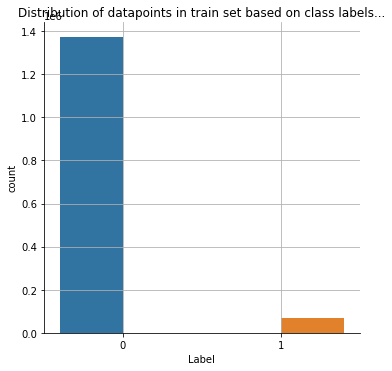

----------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
----------------------------------------------------------------------


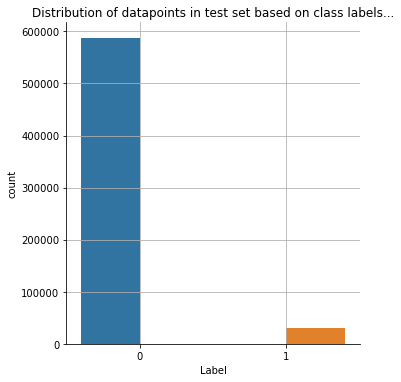

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
### plotting class distribution in train after splitting dataset
sns.catplot(data=train, x='Label', hue='Label', kind='count')
### adding title to the figure
plt.title('Distribution of datapoints in train set based on class labels...')
### adding grid to figure
plt.grid()
plt.show()

print('-'*70)
print('+'*70)
print('-'*70)

### plotting class distribution in test after splitting dataset
sns.catplot(data=test, x='Label', hue='Label', kind='count')
### adding title to the figure
plt.title('Distribution of datapoints in test set based on class labels...')
### adding grid to figure
plt.grid()
plt.show()

In [11]:
### garbage collector
gc.collect()

5703

* **Dataset has been distributed similar based on class label**

**Let's distribute train and test data into X_train, X_test, y_train, y_test so that we can feed this into ML algorithms**

In [12]:
### spliting dataframe into xtr and xte set to perform scaling on the features
X_tr = train.drop(['proto', 'state', 'service', 'Label'], axis=1)
X_te = test.drop(['proto', 'state', 'service', 'Label'], axis=1)

### spliting class lables from train and test set and reshapeing it to avoid any warning/error
y_train = np.array(train['Label'])
y_test = np.array(test['Label'])

In [13]:
### scaling datasets using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(f"Scaling training data...")
train_scaled = scaler.fit_transform(X_tr)
print(f"Scaling test data...")
test_scaled = scaler.transform(X_te)
print(f"Completed!")

Scaling training data...
Scaling test data...
Completed!


In [14]:
### stacking data for train and set which will be input to the models
from scipy import sparse

X_train = sparse.csr_matrix(np.array(np.hstack((np.array(train[['proto', 'state', 'service']]), train_scaled)), dtype=np.float32))
X_test = sparse.csr_matrix(np.array(np.hstack((np.array(test[['proto', 'state', 'service']]), test_scaled)), dtype=np.float32))

In [15]:
print(f"Shape of train dataset after stacking: {X_train.shape} and y_train: {y_train.shape}")
print(f"Shape of test dataset after stacking: {X_test.shape} and y_test: {y_test.shape}")

Shape of train dataset after stacking: (1441592, 43) and y_train: (1441592,)
Shape of test dataset after stacking: (617826, 43) and y_test: (617826,)


In [16]:
### Releasing memory by deleting variable and dataframes
### that will be no longer in use
del df
del train
del test
del train_scaled
del test_scaled
gc.collect()

30

<p style='font-size:25px; font-style:italic; font-weight: bold;'>9.&emsp;Model training and hyperparameter tuning</p>

* <p style="color:green; font-style:italic;">Hyperparameter tuning on Naive_bayes as Base model and training with best hyperparameters</p>
* <p style="color:green; font-style:italic;">Hyperparameter tuning on Decision tree model and training with best hyperparameters</p>
* <p style="color:green; font-style:italic;">Hyperparameter tuning on Logistic regression model and training with best hyperparameters</p>
* <p style="color:green; font-style:italic;">Hyperparameter tuning on SVM model and training with best hyperparameters</p>
* <p style="color:green; font-style:italic;">Hyperparameter tuning on XGBoost model and training with best hyperparameters</p>
* <p style="color:green; font-style:italic;">Hyperparameter tuning on Random forest model and training with best hyperparameters</p>

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score,recall_score
def calculate_metrices(y_true, y_pred):
    '''this function will return auc and f1 score'''
    ### calculat auc
    auc = roc_auc_score(y_true, y_pred)
    ### calculate f1-score
    f1score = f1_score(y_true, y_pred)
    gc.collect()
    return auc, f1score

In [18]:
from sklearn.metrics import roc_curve

def plot_roc_auc_curve(y_train_true, y_train_pred, y_test_true, y_test_pred):
    '''this function will plot roc auc curve on train and test data'''
    ### geting fpr and tpr for train data
    fpr, tpr, _ = roc_curve(y_train_true, y_train_pred)
    ### ploting roc curve
    plt.plot(fpr, tpr, label='train')
    ### getting fpr and tpr for test data
    fpr, tpr, _ = roc_curve(y_test_true, y_test_pred)
    ### plotting roc curve
    plt.plot(fpr, tpr, label='test')
    ### adding axis-labels to the plot
    plt.xlabel("fpr")
    ### adding axis-labels to the plot
    plt.ylabel("tpr")
    ### adding title to the plot
    plt.title("ROC AUC curve")
    ### adding legend
    plt.legend()
    plt.grid()
    plt.show()
    gc.collect()

In [19]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title=''):
    '''this function will plot confusion matrix'''
    ### getting confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)
    ### ploting conf matrix using seaborn heatmap plot
    sns.heatmap(conf_mat, annot=True, fmt='d')
    ### adding title
    plt.title(f'Confusion matrix on {title}')
    ### adding axis-labels to the plot
    plt.xlabel("prdicted")
    ### adding axis-labels to the plot
    plt.ylabel("actual")
    plt.show()
    gc.collect()

In [20]:
def random_search_cv(estimator, param_distributions, algo_name='', X_train=X_train, y_train=y_train):
    """this function will return best score and best params after applying randomized search cv on train dataset"""
    st = dt.now()
    ### initializing randomized search cv with arguments
    clf = RandomizedSearchCV(estimator, param_distributions=param_distributions, scoring='f1', cv=5, n_jobs=-1)
    print(f"tunning hyperparameter on {algo_name} model...")
    ### fitting data to the randomizedsearchcv estimator
    clf.fit(X_train, y_train)
    print(f"tunning completed!")
    print(f"\ntime taken in hyperparameter tuning: {dt.now()-st}")
    gc.collect()
    ### returns best score and best params
    return clf.best_score_, clf.best_params_

In [21]:
def train_and_evaluate(estimator, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    '''this function will train and evaluate dataset'''
    st = dt.now()
    ### fitting data to the estimator
    estimator.fit(X_train, y_train)
    print(f"training completed! and time taken: {dt.now()-st}")
    ### finding predictions on train data set
    y_tr_preds = estimator.predict(X_train )
    ### finding auc and f1score for train dataset
    tr_auc, tr_f1score = calculate_metrices(y_train, y_tr_preds)
    print(f"\nOn train data, AUC: {tr_auc}, f1-score: {tr_f1score}")
    ### finding predictions on test dataset
    y_te_preds = estimator.predict(X_test )
    ### finding auc and f1score on test dataset
    te_auc, te_f1score = calculate_metrices(y_test, y_te_preds)
    print(f"On test data, AUC: {te_auc}, f1-score: {te_f1score}")
    ### plotting confusion matrix on train and test dataset
    plot_confusion_matrix(y_train, y_tr_preds, title='train data')
    plot_confusion_matrix(y_test, y_te_preds, title='test data')
    ### plotting roc auc curve on train and test dataset
    plot_roc_auc_curve(y_train, y_tr_preds, y_test, y_te_preds)
    gc.collect()
    ### returns estimator, auc and f1score for train and test dataset
    return estimator, tr_auc, tr_f1score, te_auc, te_f1score

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on Naive_bayes as Base model</p>

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
### initialising parameters
param_distributions = {'var_smoothing':[1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01,1, 1e2]}
### hyperparameter tunning on naive bayes model
best_score, best_params = random_search_cv(GaussianNB(), X_train=X_train.toarray(),
                                           param_distributions=param_distributions, 
                                           algo_name='Naive bayes as base')

tunning hyperparameter on Naive bayes as base model...
tunning completed!

time taken in hyperparameter tuning: 0:00:30.816331


In [23]:
print(f"Best f1-score achieved by RandomizedSearchCV model: {best_score}")
var_smoothing = best_params['var_smoothing']
print(f"Best params are: {var_smoothing}")

Best f1-score achieved by RandomizedSearchCV model: 0.7328908543994821
Best params are: 1e-06


training completed! and time taken: 0:00:00.602158

On train data, AUC: 0.9792594985299837, f1-score: 0.732547157367102
On test data, AUC: 0.9792991297958374, f1-score: 0.7315634218289085


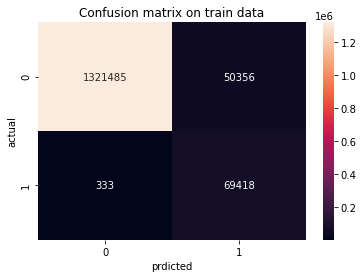

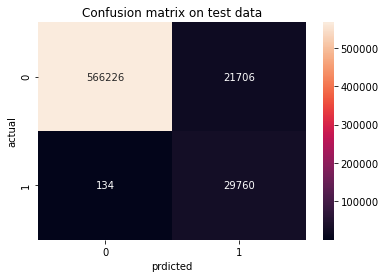

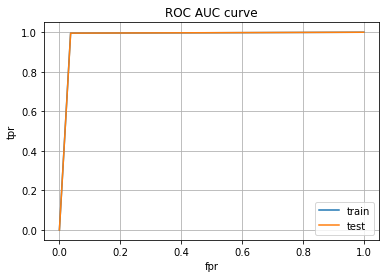

In [24]:

### training and evaluating naive bayes model on train and test dataset
base_model, nb_tr_auc, nb_tr_f1score, nb_te_auc, nb_te_f1score = train_and_evaluate(
                                                                 GaussianNB(var_smoothing=var_smoothing),
                                                                 X_train=X_train.toarray(),
                                                                 X_test=X_test.toarray())


<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots I found that our base model is giving very good auc, but but the f1 score is at 73% for both train and test dataset, it also a generalised model because there is very small difference in the scores</p>

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on Decision tree model</p>

In [30]:
from sklearn.tree import DecisionTreeClassifier
### initialising parameters
param_distributions = {
                        'max_depth':[3,5,7,9],
                        'criterion':['gini', 'entropy'],
                        'min_samples_split':[2,3,4,5,6],
                        'class_weight':['uniform', 'balanced']
                        }


### hyperparameter tunning on decision tree classifier model
best_score, best_params = random_search_cv(DecisionTreeClassifier(), 
                                           param_distributions=param_distributions, 
                                           algo_name='Decision tree')

tunning hyperparameter on Decision tree model...
tunning completed!

time taken in hyperparameter tuning: 0:04:10.001083


In [31]:
print(f"Best f1-score achieved by RandomizedSearchCV model: {best_score}")
print(f"Best params are: {best_params}")

Best f1-score achieved by RandomizedSearchCV model: 0.8728672561267435
Best params are: {'min_samples_split': 5, 'max_depth': 9, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [32]:
### initialising best params
max_depth = best_params['max_depth']
criterion = best_params['criterion']
min_samples_split = best_params['min_samples_split']
class_weight = best_params['class_weight']

training completed! and time taken: 0:00:26.648015

On train data, AUC: 0.9926064071239479, f1-score: 0.8731465196191954
On test data, AUC: 0.9922473942263232, f1-score: 0.8718846670168681


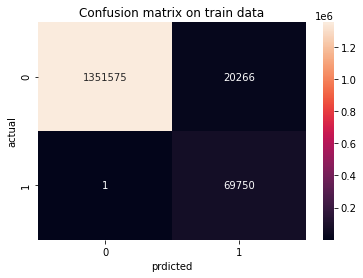

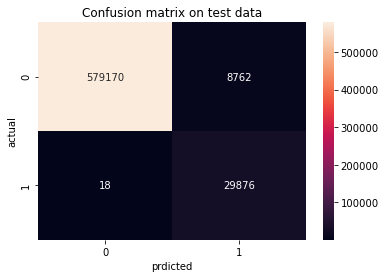

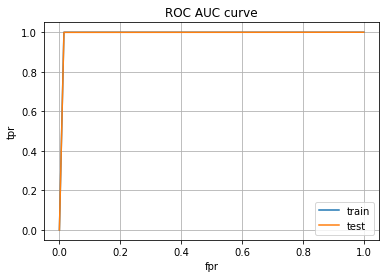

In [33]:
### initializing estimator on best params
dec_tree_model = DecisionTreeClassifier(
                                max_depth=max_depth,
                                criterion=criterion,
                                min_samples_split=min_samples_split,
                                class_weight=class_weight,
                                )
### training and evaluating decision tree classifier model on train and test dataset
dec_tree_model, dec_tree_tr_auc, dec_tree_tr_f1score, dec_tree_te_auc, dec_tree_te_f1score = train_and_evaluate(dec_tree_model)

In [34]:
gc.collect()

15

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing good compared to base model and it generalised model because the difference in the train and test f1-scores is nearly 0.5%.</p>

<p style="color:green; font-style:italic;">It is quite good in predicting abnormal class but there is a large number of normal class predicted as abnormal/malicious</p>

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on Logistic regression model</p>

In [35]:
from sklearn.linear_model import SGDClassifier
### initialising parameters
param_distributions = {
                        'penalty':['l1', 'l2', 'elasticnet'],
                        'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],
                        'max_iter':[500, 1000, 2000, 3000],
                        'epsilon':[0.1],
                        'learning_rate':['optimal', 'constant', 'invscaling', 'adaptive'],
                        'eta0':[0.001, 0.01, 1],
                        'class_weight':[None, 'balanced']
                        }
### hyperparameter tunning on logistic regression model
best_score, best_params = random_search_cv(SGDClassifier(loss='log'), 
                                           param_distributions=param_distributions, 
                                           algo_name='logistic regression')

tunning hyperparameter on logistic regression model...
tunning completed!

time taken in hyperparameter tuning: 0:02:36.200115


In [36]:
print(f"Best f1-score achieved by RandomizedSearchCV model: {best_score}")
print(f"Best params are: {best_params}")

Best f1-score achieved by RandomizedSearchCV model: 0.8475722265108994
Best params are: {'penalty': 'l2', 'max_iter': 500, 'learning_rate': 'adaptive', 'eta0': 0.01, 'epsilon': 0.1, 'class_weight': 'balanced', 'alpha': 0.0001}


In [37]:
### initialising best params
penalty = best_params['penalty']
max_iter = best_params['max_iter']
learning_rate = best_params['learning_rate']
eta0 = best_params['eta0']
epsilon = best_params['epsilon']
class_weight = best_params['class_weight']
alpha = best_params['alpha']

training completed! and time taken: 0:00:30.413081

On train data, AUC: 0.9898958834714043, f1-score: 0.8477714104758018
On test data, AUC: 0.9900297180133149, f1-score: 0.8473387566193904


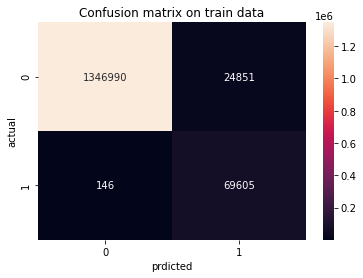

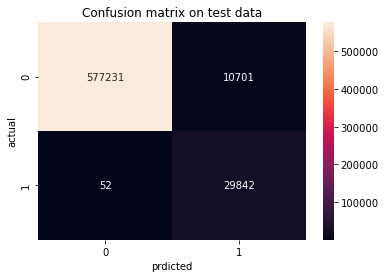

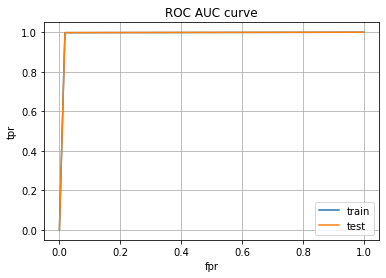

In [38]:
### initialising estimators on best params
lr_model = SGDClassifier(loss='log',
                    penalty=penalty,
                    max_iter=max_iter,
                    learning_rate=learning_rate,
                    eta0=eta0,
                    epsilon=epsilon,
                    class_weight=class_weight,
                    alpha=alpha)
### training and evaluating logistic regression model on train and test dataset
lr_model, lr_tr_auc, lr_tr_f1score, lr_te_auc, lr_te_f1score = train_and_evaluate(lr_model)

In [39]:
gc.collect()

15

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing good compared to base model and it generalised model because the difference in the train and test f1-scores is nearly 0.5%.</p>

<p style="color:green; font-style:italic;">it doesn't perform vell compared to Decision tree, but yes it is quite good in predicting abnormal class but there is a large number of normal class predicted as abnormal/malicious</p>

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on SVM model</p>

In [40]:
### initialising parameters
param_distributions = {
                        'penalty':['l1', 'l2', 'elasticnet'],
                        'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10],
                        'max_iter':[500, 1000, 2000, 3000],
                        'epsilon':[0.1],
                        'learning_rate':['optimal', 'constant', 'invscaling', 'adaptive'],
                        'eta0':[0.001, 0.01, 1],
                        'class_weight':[None, 'balanced']
                        }
### hyperparameter tunning on svm model
best_score, best_params = random_search_cv(SGDClassifier(loss='hinge'), 
                                           param_distributions=param_distributions,
                                           algo_name='SVM')

tunning hyperparameter on SVM model...
tunning completed!

time taken in hyperparameter tuning: 0:02:13.112533


In [41]:
print(f"Best f1-score achieved by RandomizedSearchCV for SVM model: {best_score}")
print(f"Best params are: {best_params}")

Best f1-score achieved by RandomizedSearchCV for SVM model: 0.8376444411567329
Best params are: {'penalty': 'l2', 'max_iter': 3000, 'learning_rate': 'invscaling', 'eta0': 1, 'epsilon': 0.1, 'class_weight': None, 'alpha': 0.01}


In [42]:
### initialising best params
penalty = best_params['penalty']
max_iter = best_params['max_iter']
learning_rate = best_params['learning_rate']
eta0 = best_params['eta0']
epsilon = best_params['epsilon']
class_weight = best_params['class_weight']
alpha = best_params['alpha']

training completed! and time taken: 0:00:04.913125

On train data, AUC: 0.9774266807972193, f1-score: 0.8429836342834404
On test data, AUC: 0.9777379664335677, f1-score: 0.8425048538062534


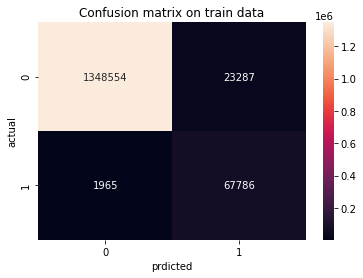

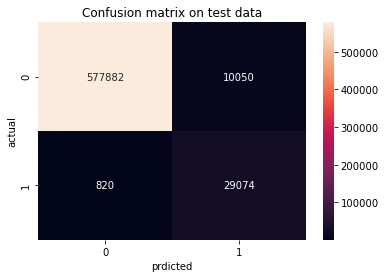

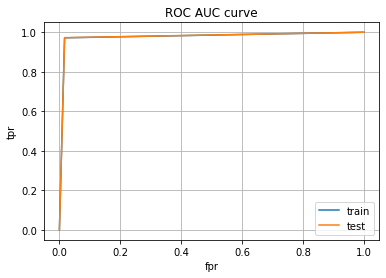

In [43]:
### initialising estimators on best params
svm_model = SGDClassifier(loss='hinge',
                    penalty=penalty,
                    max_iter=max_iter,
                    learning_rate=learning_rate,
                    eta0=eta0,
                    epsilon=epsilon,
                    class_weight=class_weight,
                    alpha=alpha)
### training and evaluating svm model on train and test dataset
svm_model, svm_tr_auc, svm_tr_f1score, svm_te_auc, svm_te_f1score = train_and_evaluate(svm_model)

In [44]:
gc.collect()

15

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing good compared to base model and it generalised model because the difference in the train and test f1-scores is nearly 0.5%.</p>

<p style="color:green; font-style:italic;">it doesn't perform well and it is not as good as in prediction compared to logistic regression because the misclassified datapoints are higher compared to logisitic regression.</p>

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on XGBoost model</p>

In [45]:
from xgboost import XGBClassifier
### initialising parameters
param_distributions = {
                        'n_estimators':[50, 100, 150, 200, 250, 300],
                        'max_depth':[3,5,7,9,11],
                        'learning_rate':[1e-03, 1e-02, 1e-01, 1, 1e01, 1e02],
                        'booster':['gbtree', 'gblinear', 'dart'],
                        'tree_method':['exact', 'approx', 'hist', 'gpu_hist'],
                        'sampling_method':['uniform', 'gradient_based'],                   
                        }
### hyperparameter tunning on xgboost classifier model
best_score, best_params = random_search_cv(XGBClassifier(), 
                                           param_distributions=param_distributions,
                                           algo_name='XGBoost')

tunning hyperparameter on XGBoost model...
tunning completed!

time taken in hyperparameter tuning: 4:26:11.475976


In [46]:
print(f"Best f1-score achieved by RandomizedSearchCV for xgboost model: {best_score}")
print(f"Best params are: {best_params}")

Best f1-score achieved by RandomizedSearchCV for xgboost model: 0.9451469962996683
Best params are: {'tree_method': 'approx', 'sampling_method': 'uniform', 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 1, 'booster': 'dart'}


In [47]:
### initialising best params
tree_method = best_params['tree_method']
sampling_method = best_params['sampling_method']
n_estimators = best_params['n_estimators']
learning_rate = best_params['learning_rate']
max_depth = best_params['max_depth']
booster = best_params['booster']

training completed! and time taken: 0:33:48.633681

On train data, AUC: 0.9996489939107732, f1-score: 0.9995196202849297
On test data, AUC: 0.9704059208974176, f1-score: 0.9472747123540775


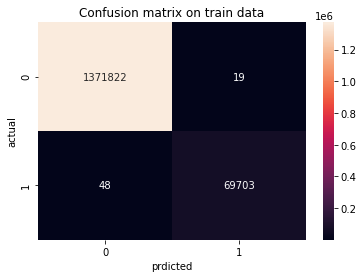

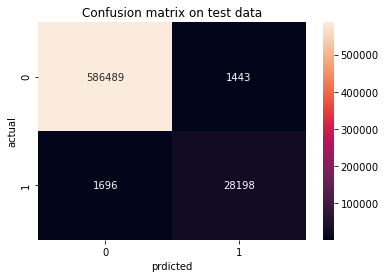

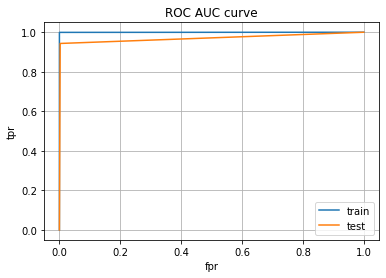

In [48]:
### initialising estimators on best params
xgb_model = XGBClassifier(n_estimators = n_estimators, 
                    max_depth = max_depth,
                    learning_rate = learning_rate, 
                    booster = booster, 
                    tree_method = tree_method,
                    sampling_method = sampling_method,
                    n_jobs = -1
                    )
### training and evaluating xgboost classifier model on train and test dataset
xgb_model, xgb_tr_auc, xgb_tr_f1score, xgb_te_auc, xgb_te_f1score = train_and_evaluate(xgb_model)

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing very good compared to base, decision tree, logistic regression and svm model, and it not as generalised compared to the previous ones</p>
<p style="color:green; font-style:italic;">because the difference in the train and test f1-scores is nearly 5%. And we can see that the misclassified points in test data is greater than train dataset</p>

* <p style="font-size:20px; font-style:italic; color:green; font-weight:bold">XGBoost classifier with default parameters</p>

training completed! and time taken: 0:03:51.762440

On train data, AUC: 0.9726257966163565, f1-score: 0.9552793504117771
On test data, AUC: 0.966276356553211, f1-score: 0.9438065649061191


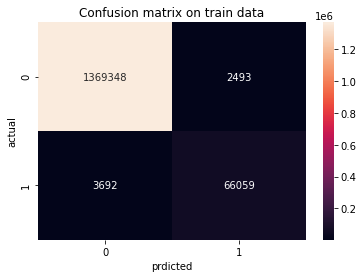

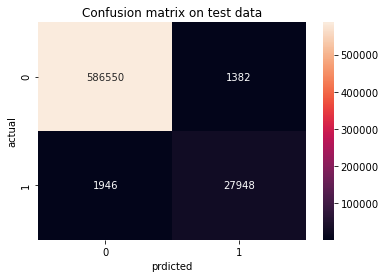

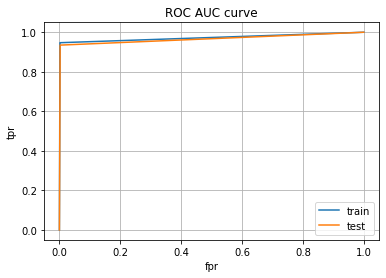

In [49]:
### training and evaluating xgboost classifier model with default parameters on train and test dataset
def_xgb_model = XGBClassifier(n_jobs=-1)
def_xgb_model, def_xgb_tr_auc, def_xgb_tr_f1score, def_xgb_te_auc, def_xgb_te_f1score = train_and_evaluate(def_xgb_model)

In [50]:
gc.collect()

15

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model with default parameters is performing very good, and it generalised because the difference in the train and test f1-scores is nearly 1% which is quite low. And having auc and f1-score better than previous algorithms.</p>

* <p style="font-size:20px; font-style:italic; font-weight:bold;">Hyperparameter tuning on Random Forest model</p>

In [51]:
from sklearn.ensemble import RandomForestClassifier
### initialising parameters
param_distributions = {
                        'n_estimators': [70, 85, 100, 130, 150, 200],
                        'criterion': ['gini', 'entropy'],
                        'max_depth':[2,4,6,8,10],
                        'min_samples_split': [1,2,3,4,5,6],
                        'min_samples_leaf':[1,2,3,4,5],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'class_weight': [None, 'balanced', 'balanced_subsample'],
                        'bootstrap':[True, False],
                        'ccp_alpha': [0.005, 0.01, 0.2, 0.3,0.5],
                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
                        }
### hyperparameter tunning on random forest classifier model
best_score, best_params = random_search_cv(RandomForestClassifier(), 
                                           param_distributions=param_distributions,
                                           algo_name='Random forest classifier')

tunning hyperparameter on Random forest classifier model...
tunning completed!

time taken in hyperparameter tuning: 0:43:36.822935


In [52]:
print(f"Best f1-score achieved by RandomizedSearchCV random forest model: {best_score}")
print(f"Best params are: {best_params}")

Best f1-score achieved by RandomizedSearchCV random forest model: 0.8322643125623266
Best params are: {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_samples': 0.5, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'ccp_alpha': 0.01, 'bootstrap': False}


In [53]:
### initialising best params
n_estimators = best_params['n_estimators']
criterion = best_params['criterion']
max_depth = best_params['max_depth']
min_samples_split = best_params['min_samples_split']
min_samples_leaf = best_params['min_samples_leaf']
max_features = best_params['max_features']
class_weight = best_params['class_weight']
bootstrap = best_params['bootstrap']
ccp_alpha = best_params['ccp_alpha']
max_samples = best_params['max_samples']

training completed! and time taken: 0:02:28.770943

On train data, AUC: 0.9892975935257804, f1-score: 0.8261106439425343
On test data, AUC: 0.9892751202520019, f1-score: 0.8258125112225306


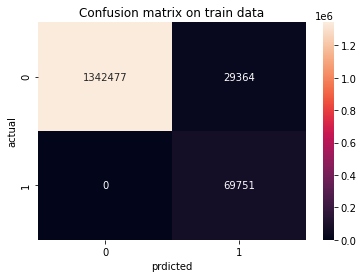

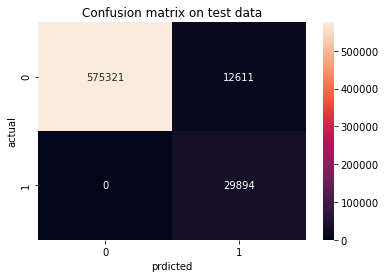

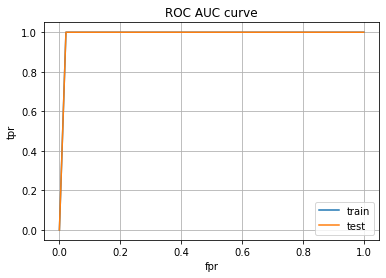

In [54]:
### initialising estimators on best params
rf_model = RandomForestClassifier(
                    n_estimators = n_estimators,
                    criterion = criterion,
                    max_depth = max_depth,
                    min_samples_split = min_samples_split,
                    min_samples_leaf = min_samples_leaf,
                    max_features = max_features,
                    class_weight = class_weight,
                    bootstrap = bootstrap,
                    ccp_alpha = ccp_alpha,
                    max_samples = max_samples,
                    n_jobs = -1
                    )

### training and evaluating random forest classifier model on train and test dataset
rf_model, rf_tr_auc, rf_tr_f1score, rf_te_auc, rf_te_f1score = train_and_evaluate(rf_model)

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing good compared to base model but not others, and it is generalized model because the difference in the train and test f1-scores is less than 0.1%, but compared to other models the f1-score is quite low.</p>

<p style="color:green; font-style:italic;">the False negatives is 0 but the false positives is very large, which classifies normal traffics as abnorm/malicious</p>
<p style="color:green; font-style:italic;">Hence, we can conclude that the it works very well on one class but not on the other class</p>

* <p style="font-size:20px; font-style:italic; color:green; font-weight:bold">Random Forest Classifier with default parameters</p>

training completed! and time taken: 0:07:02.002404

On train data, AUC: 0.9996508162794004, f1-score: 0.9995554535807496
On test data, AUC: 0.9641105186824225, f1-score: 0.9372327171094723


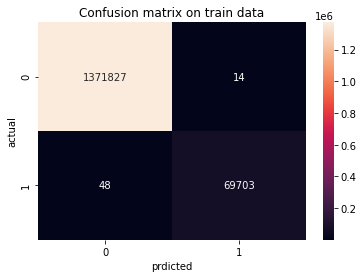

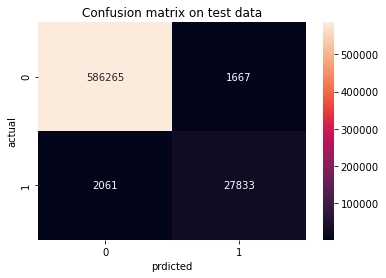

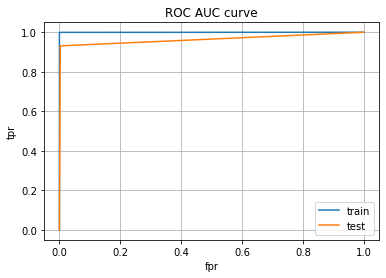

In [55]:
### training and evaluating random forest classifier model with default parameters on train and test dataset
def_rf_model = RandomForestClassifier(n_jobs=-1)
def_rf_model, def_rf_tr_auc, def_rf_tr_f1score, def_rf_te_auc, def_rf_te_f1score = train_and_evaluate(def_rf_model)

<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">From the above scores and plots we I found that this model is performing very good compared to tunned random forest but it is overfitted because the difference in the train and test f1-scores is nearly 6%. It works well on train data but not on the test data, we see the confusion matrix.</p>

<p style="font-size:22px; font-style:italic; color:black; font-weight:bold">10.&emsp;Summary of all the estimators with their respective scores and auc</p>

In [57]:
columns = ['train auc', 'test auc', 'train f1-score', 'test f1-score']
scores = [
          [nb_tr_auc, nb_te_auc, nb_tr_f1score, nb_te_f1score],
          [dec_tree_tr_auc, dec_tree_tr_f1score, dec_tree_te_auc, dec_tree_te_f1score],
          [lr_tr_auc, lr_te_auc, lr_tr_f1score, lr_te_f1score],
          [svm_tr_auc, svm_te_auc, svm_tr_f1score, svm_te_f1score],
          [xgb_tr_auc, xgb_te_auc, xgb_tr_f1score, xgb_te_f1score],
          [def_xgb_tr_auc, def_xgb_te_auc, def_xgb_tr_f1score, def_xgb_te_f1score],
          [rf_tr_auc, rf_te_auc, rf_tr_f1score, rf_te_f1score],
          [def_rf_tr_auc, def_rf_te_auc, def_rf_tr_f1score, def_rf_te_f1score],
         ]

index = ['Naive Bayes Classifier (Base model)',
         'Decision Tree Classifier',
         'Logistic Regression',
         'Support Vector Machine (SVM)',
         'XGBoost Classifier',
         'XGBoost with default parameters',
         'Random Forest Classifier',
         'Random Forest Classifier with default parameters',
]

score_df = pd.DataFrame(data=scores, columns=columns, index=index)
score_df

,train auc,test auc,train f1-score,test f1-score
Naive Bayes Classifier (Base model),0.979259498530,0.979299129796,0.732547157367,0.731563421829
Decision Tree Classifier,0.992606407124,0.873146519619,0.992247394226,0.871884667017
Logistic Regression,0.989895883471,0.990029718013,0.847771410476,0.847338756619
Support Vector Machine (SVM),0.977426680797,0.977737966434,0.842983634283,0.842504853806
XGBoost Classifier,0.999648993911,0.970405920897,0.999519620285,0.947274712354
XGBoost with default parameters,0.972625796616,0.966276356553,0.955279350412,0.943806564906
Random Forest Classifier,0.989297593526,0.989275120252,0.826110643943,0.825812511223
Random Forest Classifier with default parameters,0.999650816279,0.964110518682,0.999555453581,0.937232717109


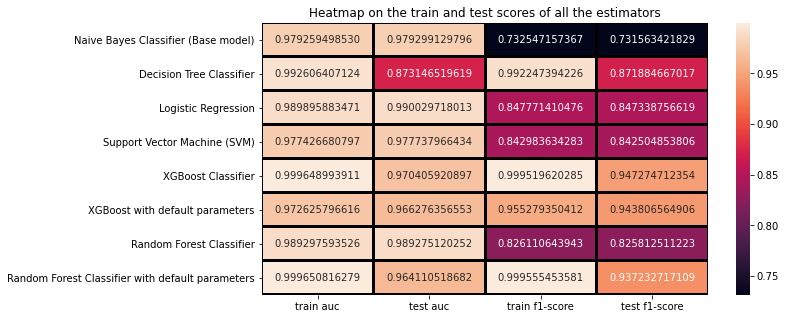

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(score_df, fmt='.12f', annot=True, linecolor='black', linewidths='2', )
plt.title('Heatmap on the train and test scores of all the estimators')
plt.show()


<p style='font-size:18px; color:red; font-style:italic; font-weight:bold'>comparison between baseline model and selected model scores</p>

In [79]:
score_df.loc[['Naive Bayes Classifier (Base model)', 'XGBoost with default parameters'],]

,train auc,test auc,train f1-score,test f1-score
Naive Bayes Classifier (Base model),0.979259498530,0.979299129796,0.732547157367,0.731563421829
XGBoost with default parameters,0.972625796616,0.966276356553,0.955279350412,0.943806564906


<p style="font-size:22px; font-style:italic; font-weight:bold">Observation</p>
<p style="color:green; font-style:italic;">from the above heatmap we found that XGBoost and Random Forest had perfromed well from our base model Naive bayes</p>
<p style="color:green; font-style:italic;">but the xgboost with default parameters have very similar auc and f1-score for both train and test data.</p>
<p style="font-style:italic; color:red; font-weight:bold">Hence, I can conclude that our XGBoost model with default parameters is like generalized model from all the models with best auc and f1-score.</p>

<p style="font-size:22px; color:black; font-style:italic; font-weight:bold;">11.&emsp;Saving models, scaling vectors and the unique categories in proto, service, state feature, engineered features name in pickle file</p>

In [63]:
### saving uniques categorical value in respective feature list to disk
with open('unique_categories.pkl', 'wb') as f:
    pickle.dump([unique_proto,unique_service,unique_state], f)

In [68]:
### saving scaler vector to disk
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [71]:
### storing models in the form of key, value pair in dictionary
estimators_dict = {
                    'base_model':base_model, 
                   'def_xgb_model':def_xgb_model, 
                   'def_rf_model':def_rf_model, 
                   'dec_tree_model':dec_tree_model, 
                   'lr_model': lr_model, 
                   'svm_model':svm_model, 
                   'xgb_model':xgb_model, 
                   'rf_model':rf_model
                  }
### for each key and its model in dictionary
for name, model_name in estimators_dict.items():
    ### saving key and its model in the disk
    with open(name+'.pkl', 'wb') as f:
        pickle.dump(model_name, f)

In [73]:
c### features name on that feature engineering to be perform
feature_eng =  [["sttl", "dttl"],
                ["sbytes", "dbytes"],
                ["Sload", "Dload"],
                ["stcpb", "dtcpb"],
                ["smeansz", "dmeansz"],
                ["Sjit", "Djit"],
                ["Sintpkt", "Dintpkt"],
                ["trans_depth", "res_bdy_len"],
                ["ct_state_ttl", "ct_flw_http_mthd"],
                ["ct_srv_dst", "ct_dst_ltm"],
                ["ct_src_", "ct_src_dport_ltm"]]
### saving in the disk
with open('feature_eng.pkl', 'wb') as f:
    pickle.dump(feature_eng, f)

<p style='font-style:italic; font-weight:bold; font-size:15px;'>******************************************************************************END************************************************************************************</p>